### Installing Dependencies

In [0]:
!pip install -U --pre tensorflow
!pip install seaborn
!pip install matplotlib
!pip install numpy 

    100% |████████████████████████████████| 79.9MB 389kB/s 
    100% |████████████████████████████████| 419kB 17.2MB/s 
    100% |████████████████████████████████| 3.0MB 10.5MB/s 
    100% |████████████████████████████████| 61kB 22.5MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


### Importing Dependencies

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow import nn
from tensorflow.keras import optimizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import random
import math

from __future__ import print_function, absolute_import, division

import warnings
warnings.filterwarnings("ignore")

is_python = "inline" in matplotlib.get_backend()
if is_python:
  from IPython import display
  
plt.style.use("ggplot")

### Importing Dataset

In [0]:
train_data_dir = 'sample_data/california_housing_train.csv'
test_data_dir = 'sample_data/california_housing_test.csv'

In [0]:
raw_train_data = pd.read_csv(train_data_dir,skipinitialspace=True,na_values='?')
raw_test_data = pd.read_csv(test_data_dir,skipinitialspace=True,na_values='?')

In [0]:
train_data = raw_train_data.copy()
test_data = raw_test_data.copy()

In [0]:
print("Train Data")
print(train_data.head(3))
print("\nTest Data")
print(test_data.head(3))

Train Data
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  

Test Data
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0 

In [0]:
train_data.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
test_data.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
train_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [0]:
test_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589200,1.994936,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,3000.0,35.635390,2.129670,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,3000.0,28.845333,12.555396,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,3000.0,2599.578667,2155.593332,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,3000.0,529.950667,415.654368,2.0000,291.000,437.00000,636.000000,5419.0000
population,3000.0,1402.798667,1030.543012,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,3000.0,489.912000,365.422710,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,3000.0,3.807272,1.854512,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,3000.0,205846.275000,113119.687470,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitude              3000 non-null float64
housing_median_age    3000 non-null float64
total_rooms           3000 non-null float64
total_bedrooms        3000 non-null float64
population            3000 non-null float64
households            3000 non-null float64
median_income         3000 non-null float64
median_house_value    3000 non-null float64
dtypes: float64(9)
memory usage: 211.0 KB


### Preparing the Dataset

In [0]:
train_labels = train_data.pop("median_house_value")
test_labels = test_data.pop("median_house_value")

In [0]:
train_stats = train_data.describe()
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001


### Vizualzing the Dataset

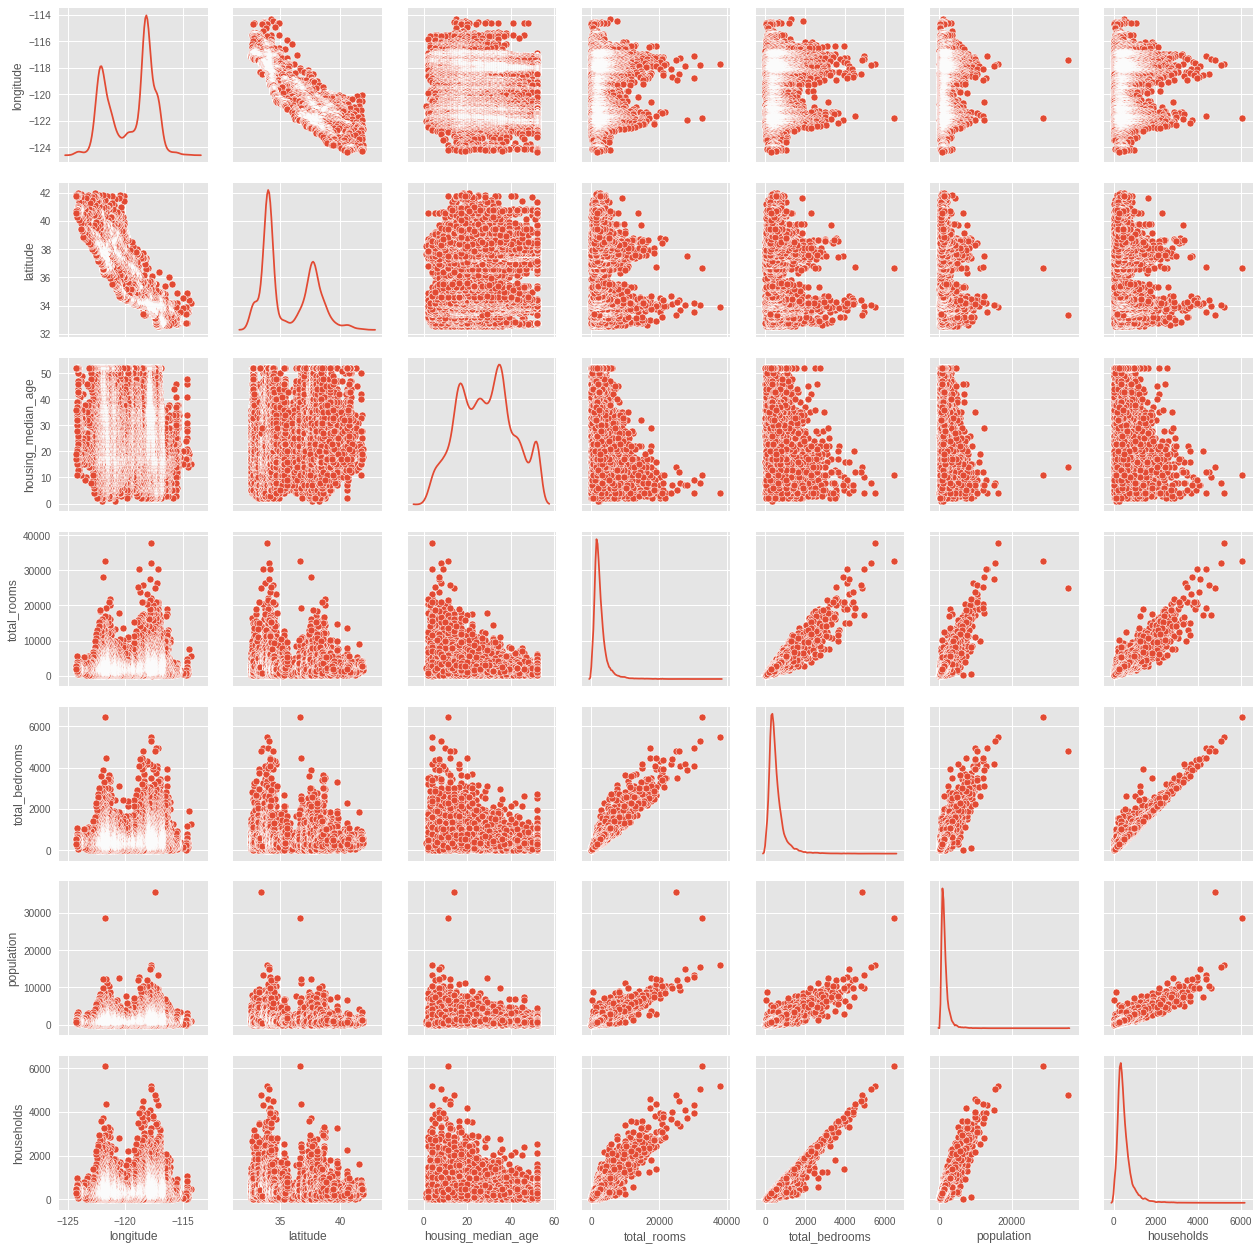

In [0]:
sns.pairplot(train_data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"]],diag_kind="kde")

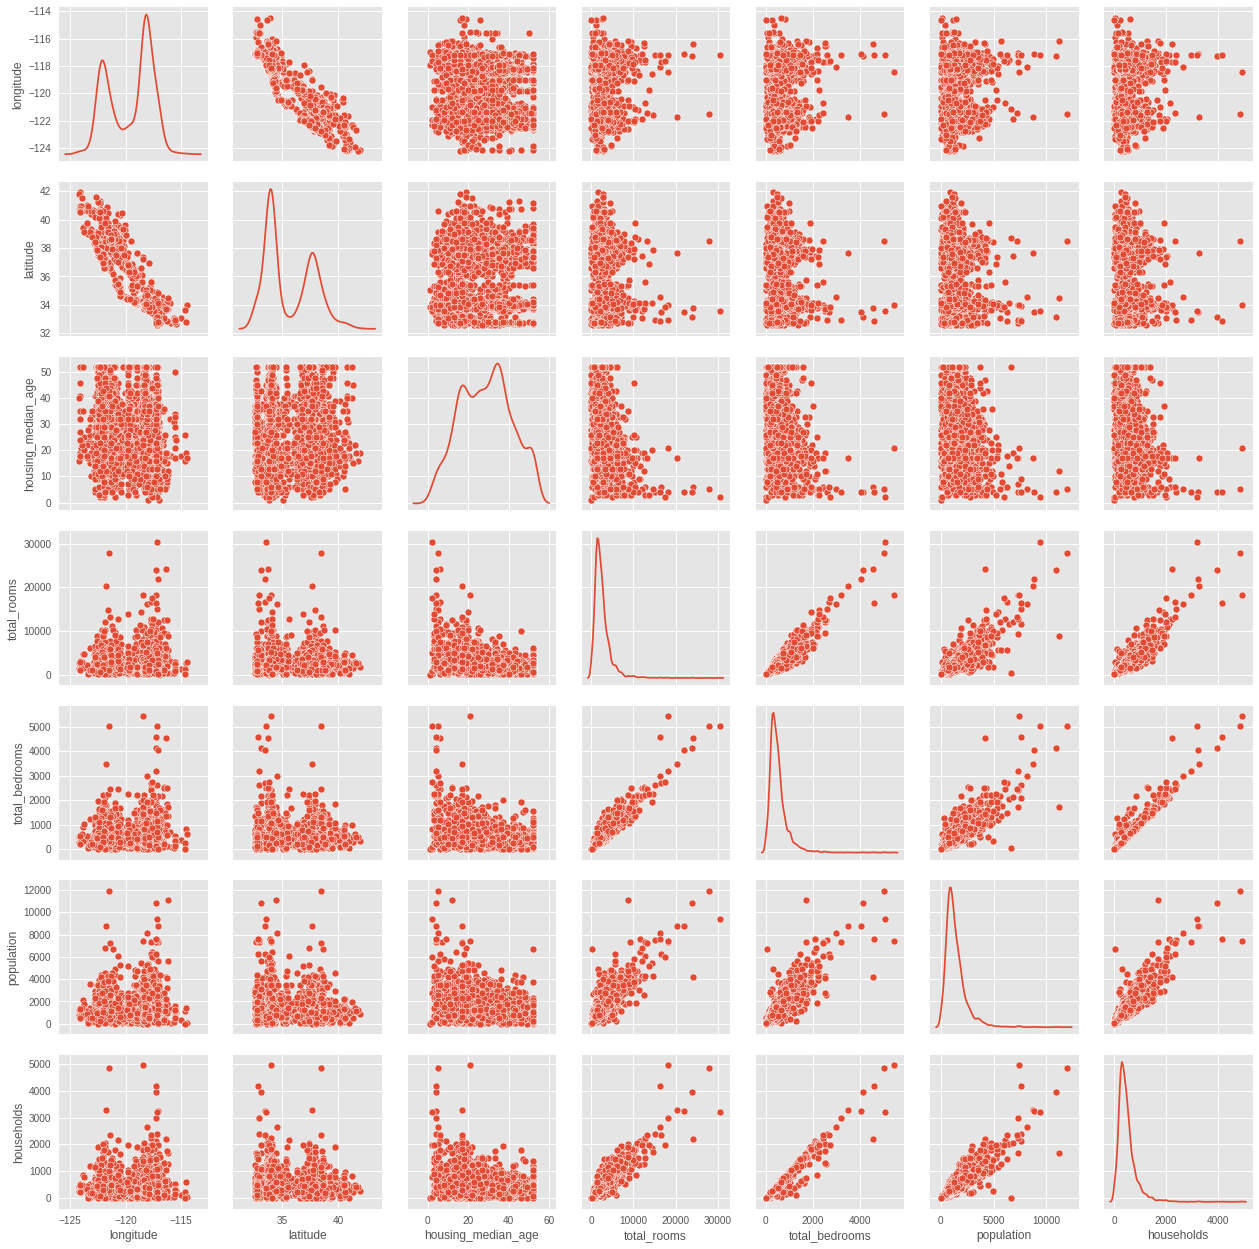

In [0]:
sns.pairplot(test_data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"]],diag_kind="kde")

### Normalizing the Data

In [0]:
norm = lambda x: (x-train_stats['mean'])/train_stats['std']

In [0]:
train_data_norm = norm(train_data)
test_data_norm = norm(test_data)

In [0]:
train_data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424


In [0]:
test_data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.240741,0.816330,-0.126270,0.569434,0.288468,0.093589,0.272490,1.428039
1,0.629428,-0.638749,1.144889,-0.520042,-0.544273,-0.540639,-0.583120,-0.149138
2,0.873797,-0.863328,-0.126270,0.433651,-0.076894,0.047416,-0.016181,1.000873
3,0.599505,-0.844613,-0.046823,-1.181985,-1.244155,-1.202745,-1.274890,1.180365
4,-0.053807,0.329744,-0.761850,-0.643440,-0.700857,-0.504920,-0.687146,-0.495807


### Model

In [0]:
def regression_model():
  
  model = keras.Sequential([
                            keras.layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_data.keys())]),
                            keras.layers.Dropout(0.1),
                            keras.layers.Dense(32,activation=tf.nn.relu),
                            
                            keras.layers.Dense(1)
                           ])
  
  optimizer = optimizers.RMSprop(lr=0.003)
  
  model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=['mean_squared_error','mean_absolute_error'])
  
  return model

In [0]:
model = regression_model()

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = train_data[:10]
example_result = model.predict(train_data)
example_result

array([[-13710.539],
       [-16388.172],
       [-17883.885],
       ...,
       [-21459.203],
       [-17723.469],
       [-19665.305]], dtype=float32)

### Training the Model

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch%100==0: print("epoch: ",int(epoch/100)+1)
    print(".",end="")
  
EPOCHS = 1000

model_hist = model.fit(train_data_norm,train_labels,epochs=EPOCHS,verbose=0,callbacks=[PrintDot()],validation_split=0.2)

epoch:  1
....................................................................................................epoch:  2
....................................................................................................epoch:  3
....................................................................................................epoch:  4
....................................................................................................epoch:  5
....................................................................................................epoch:  6
....................................................................................................epoch:  7
....................................................................................................epoch:  8
....................................................................................................epoch:  9
....................................................................................................epoch:  10

In [0]:
hist = pd.DataFrame(model_hist.history)
hist['epoch'] = model_hist.epoch
hist.head()
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.554666e+09,40984.847656,3.554665e+09,5.751306e+09,57529.132812,5.751307e+09,995
996,3.553276e+09,40990.867188,3.553274e+09,5.755132e+09,57516.136719,5.755131e+09,996
997,3.551383e+09,41031.316406,3.551382e+09,5.760394e+09,57542.457031,5.760394e+09,997
998,3.550799e+09,40938.621094,3.550798e+09,5.746347e+09,57497.785156,5.746348e+09,998
999,3.549801e+09,40970.019531,3.549802e+09,5.748095e+09,57505.398438,5.748096e+09,999


In [0]:
def plot_history(model_history):
  hist = pd.DataFrame(model_history.history)
  hist['epoch'] = model_history.epoch
  
  sns.set_style('whitegrid')
  plt.figure()
  plt.xlabel("Mean Absolute Error")
  plt.ylabel("Epochs")
  plt.plot(hist['epoch'],hist['mean_absolute_error'],label="Train Error")
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],label="Val Error")
  plt.legend()
  sns.despine(offset=10,trim=True)

  plt.figure()
  plt.xlabel("Mean Squared Error")
  plt.ylabel("Epochs")
  plt.plot(hist['epoch'],hist['mean_squared_error'],label="Train Error")
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],label="Val Error")
  sns.despine(offset=10,trim=True)
  plt.legend()
  
  plt.show()

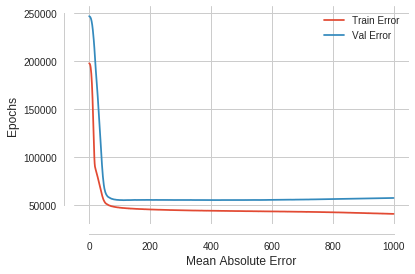

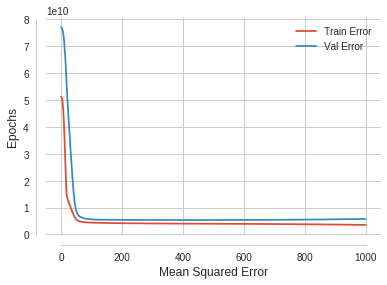

In [0]:
plot_history(model_hist)

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = regression_model()

model_hist = model.fit(train_data_norm,train_labels,epochs=EPOCHS,verbose=0,validation_split=0.2,callbacks=[PrintDot(),early_stopping])

epoch:  1
................................................................

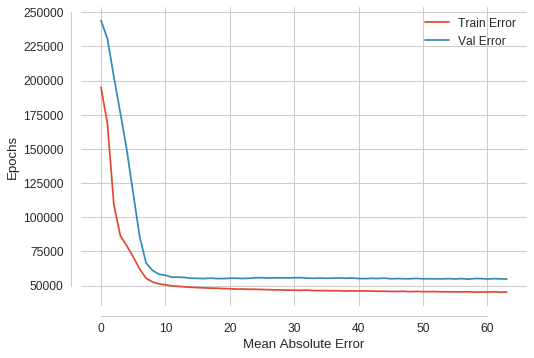

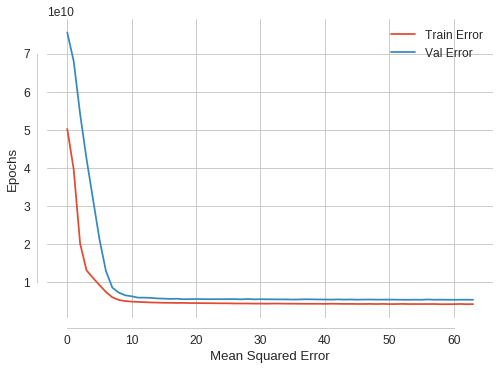

In [0]:
plot_history(model_hist)

In [0]:
loss, mae, mse = model.evaluate(test_data_norm,test_labels)

3000/3000 [==============================] - 0s 29us/sample - loss: 4415592203.6053 - mean_squared_error: 4415592448.0000 - mean_absolute_error: 46522.0703


In [0]:
print("Testing Mean Absolute Error {:5.2f} MPG".format(mae))

Testing Mean Absolute Error 4415592448.00 MPG


### Make Predictions

In [0]:
test_predictions = model.predict(test_data_norm).flatten()

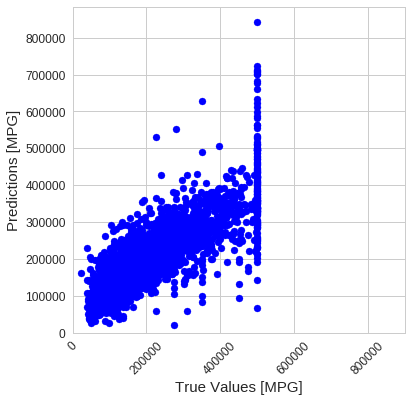

In [0]:
plt.figure(figsize=(6,6))
plt.scatter(test_labels,test_predictions,c='b')
plt.xlabel("True Values [MPG]",fontsize=15)
plt.ylabel('Predictions [MPG]',fontsize=15)
plt.xticks(rotation=45)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100])
plt.show()


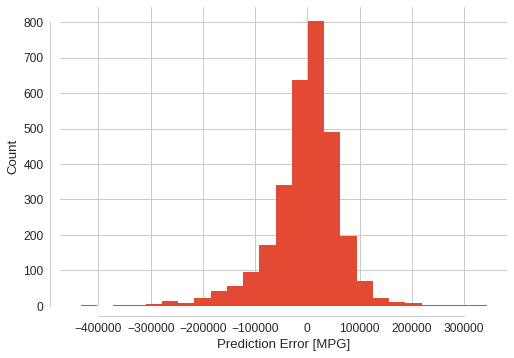

In [0]:
error = test_predictions - test_labels
plt.hist(error,bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel("Count")
sns.despine(offset=10,trim=True)

### Final Predictions

In [0]:
for i in range(10):
  idx = random.randint(0,test_data.shape[0])
  print("True value: {}".format(test_labels.iloc[idx]),end="")
  print("\tPredicted value: {}".format(pd.Series(test_predictions).iloc[idx]))

True value: 210700.0	Predicted value: 234752.078125
True value: 126000.0	Predicted value: 158469.90625
True value: 152100.0	Predicted value: 177779.0
True value: 96200.0	Predicted value: 121454.3828125
True value: 500001.0	Predicted value: 422353.71875
True value: 100000.0	Predicted value: 123628.984375
True value: 248400.0	Predicted value: 255735.40625
True value: 269700.0	Predicted value: 224378.96875
True value: 106700.0	Predicted value: 198517.0625
True value: 141800.0	Predicted value: 119325.0078125
